In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/RMS_Crime_Incidents.csv")

<ipython-input-2-b312e730e058>:1: DtypeWarning: Columns (8,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/RMS_Crime_Incidents.csv")


In [ ]:
df.head()

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,...,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,ibr_date,oid
0,-83.179214,42.403909,3006050,1612250091,Keeler Ave & Schaefer Hwy,LARCENY - OTHER,LARCENY,2307,23007,LARCENY - OTHER,...,0201,02,261635370002010,Bethune Community,2,48227,-83.179214,42.403909,2017/03/16 09:10:42+00,1
1,-82.950074,42.420468,3009883,1701040260,Roxbury St & Grayton St,LARCENY - OTHER,LARCENY,2307,23007,LARCENY - OTHER,...,0907,09,261635009002005,Yorkshire Woods,4,48224,-82.950074,42.420468,2017/06/25 18:13:34+00,2
2,-83.096278,42.442265,3025623,1702150169,E Remington Ave & Omira St,ARSON,ARSON,2099,20000,ARSON,...,1101,11,261635081004009,Nolan,3,48203,-83.096278,42.442265,2017/12/21 11:19:04+00,3
3,-83.238621,42.424490,3047921,1704080028,Pickford St & Evergreen Rd,ARSON,ARSON,2099,20000,ARSON,...,0806,08,261635411001008,Holcomb Community,1,48219,-83.238621,42.424490,2017/05/15 13:28:35+00,4
4,-83.138597,42.363985,3075180,1706090001,Westfield St & Northfield St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,1006,10,261635335001004,Midwest,6,48204,-83.138597,42.363985,2017/06/25 18:13:34+00,5


In [ ]:
df.shape

(510396, 25)

In [ ]:
df.columns

Index(['X', 'Y', 'crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_timestamp', 'incident_time',
       'day_of_week', 'hour_of_day', 'year', 'scout_car_area', 'precinct',
       'block_id', 'neighborhood', 'council_district', 'zip_code', 'longitude',
       'latitude', 'ibr_date', 'oid'],
      dtype='object')

In [ ]:
df.dtypes

X                      float64
Y                      float64
crime_id                 int64
report_number            int64
address                 object
offense_description     object
offense_category        object
state_offense_code       int64
arrest_charge           object
charge_description      object
incident_timestamp      object
incident_time           object
day_of_week              int64
hour_of_day              int64
year                     int64
scout_car_area          object
precinct                object
block_id                 int64
neighborhood            object
council_district         int64
zip_code                 int64
longitude              float64
latitude               float64
ibr_date                object
oid                      int64
dtype: object

In [ ]:
df.isnull().sum()

X                         0
Y                         0
crime_id                  0
report_number             0
address                   0
offense_description       0
offense_category          0
state_offense_code        0
arrest_charge             0
charge_description        0
incident_timestamp        0
incident_time             0
day_of_week               0
hour_of_day               0
year                      0
scout_car_area            0
precinct                  0
block_id                  0
neighborhood              0
council_district          0
zip_code                  0
longitude                 0
latitude                  0
ibr_date               6397
oid                       0
dtype: int64

In [ ]:
df['oid'].nunique()

510396

In [ ]:
df['offense_category'].nunique()

30

In [ ]:
df['offense_category'].unique()

array(['LARCENY', 'ARSON', 'ROBBERY', 'FRAUD', 'DAMAGE TO PROPERTY',
       'RUNAWAY', 'ASSAULT', 'OTHER', 'STOLEN VEHICLE', 'BURGLARY',
       'OUIL', 'STOLEN PROPERTY', 'EXTORTION', 'FAMILY OFFENSE',
       'KIDNAPPING', 'AGGRAVATED ASSAULT', 'WEAPONS OFFENSES',
       'SEX OFFENSES', 'SEXUAL ASSAULT', 'DANGEROUS DRUGS',
       'MISCELLANEOUS', 'HOMICIDE', 'FORGERY', 'DISORDERLY CONDUCT',
       'OBSTRUCTING JUDICIARY', 'LIQUOR', 'SOLICITATION',
       'OBSTRUCTING THE POLICE', 'JUSTIFIABLE HOMICIDE', 'GAMBLING'],
      dtype=object)

In [ ]:
df['offense_category'].value_counts()

ASSAULT                   92811
LARCENY                   76437
DAMAGE TO PROPERTY        65722
AGGRAVATED ASSAULT        52878
STOLEN VEHICLE            45035
FRAUD                     40496
BURGLARY                  39692
WEAPONS OFFENSES          18489
ROBBERY                   12265
DANGEROUS DRUGS           10019
STOLEN PROPERTY            9349
SEX OFFENSES               7168
OBSTRUCTING JUDICIARY      6994
OBSTRUCTING THE POLICE     4959
SEXUAL ASSAULT             4671
ARSON                      4279
OUIL                       3262
FAMILY OFFENSE             2705
RUNAWAY                    2416
MISCELLANEOUS              2216
HOMICIDE                   1786
DISORDERLY CONDUCT         1704
OTHER                      1487
FORGERY                    1435
KIDNAPPING                 1186
LIQUOR                      488
EXTORTION                   278
JUSTIFIABLE HOMICIDE        127
SOLICITATION                 33
GAMBLING                      9
Name: offense_category, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='offense_category', ylabel='count'>

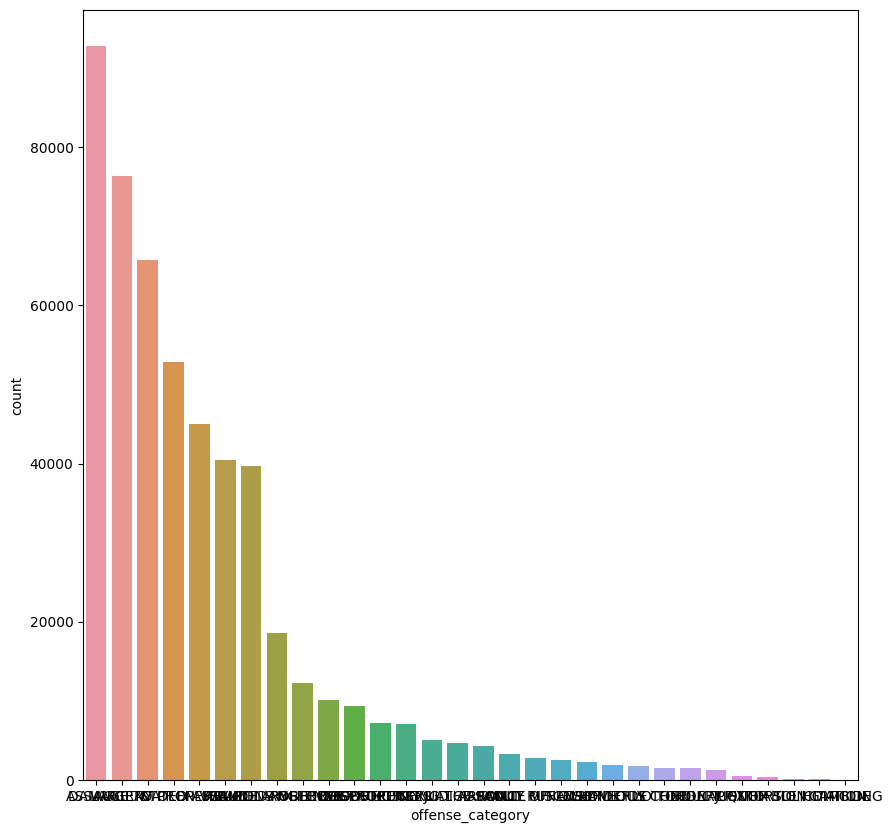

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='offense_category',order=df['offense_category'].value_counts().index)

In [ ]:
cluster_cnt=df['offense_category'].value_counts()>1000
major_cluster=cluster_cnt[cluster_cnt==True].index

df_1000=df[df['offense_category'].isin(major_cluster)]

df_1000['offense_category'].value_counts()

ASSAULT                   92811
LARCENY                   76437
DAMAGE TO PROPERTY        65722
AGGRAVATED ASSAULT        52878
STOLEN VEHICLE            45035
FRAUD                     40496
BURGLARY                  39692
WEAPONS OFFENSES          18489
ROBBERY                   12265
DANGEROUS DRUGS           10019
STOLEN PROPERTY            9349
SEX OFFENSES               7168
OBSTRUCTING JUDICIARY      6994
OBSTRUCTING THE POLICE     4959
SEXUAL ASSAULT             4671
ARSON                      4279
OUIL                       3262
FAMILY OFFENSE             2705
RUNAWAY                    2416
MISCELLANEOUS              2216
HOMICIDE                   1786
DISORDERLY CONDUCT         1704
OTHER                      1487
FORGERY                    1435
KIDNAPPING                 1186
Name: offense_category, dtype: int64

In the training set we take 750 samples (roughly 70% of smallest cluster) from each cluster to have equal representation.

For very large clusters, a proportional number of extra crime samples for those clusters was added to the training set to a maximum of 1000 samples for any single crime cluster.

In [ ]:
def find_sample_size(n,maxsize):
  if n<=10000:
    return 750
  else:
    return 750+int((n-10000)/(maxsize-10000)*250)

ccnt=df_1000['offense_category'].value_counts()
maxsize=ccnt.max()

sample_size=[]

for i in ccnt:
  sample_size.append(find_sample_size(i,maxsize))


In [ ]:
sample_size

[1000,
 950,
 918,
 879,
 855,
 842,
 839,
 775,
 756,
 750,
 750,
 750,
 750,
 750,
 750,
 750,
 750,
 750,
 750,
 750,
 750,
 750,
 750,
 750,
 750]

In [ ]:
cl_size=pd.Series(data=sample_size,index=ccnt.index)

In [ ]:
cl_size

ASSAULT                   1000
LARCENY                    950
DAMAGE TO PROPERTY         918
AGGRAVATED ASSAULT         879
STOLEN VEHICLE             855
FRAUD                      842
BURGLARY                   839
WEAPONS OFFENSES           775
ROBBERY                    756
DANGEROUS DRUGS            750
STOLEN PROPERTY            750
SEX OFFENSES               750
OBSTRUCTING JUDICIARY      750
OBSTRUCTING THE POLICE     750
SEXUAL ASSAULT             750
ARSON                      750
OUIL                       750
FAMILY OFFENSE             750
RUNAWAY                    750
MISCELLANEOUS              750
HOMICIDE                   750
DISORDERLY CONDUCT         750
OTHER                      750
FORGERY                    750
KIDNAPPING                 750
dtype: int64

<Axes: >

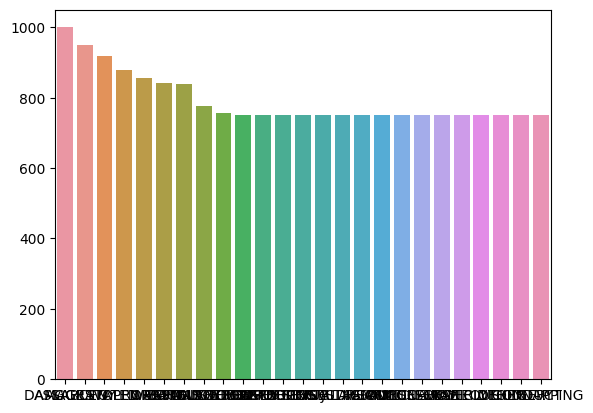

In [ ]:
sns.barplot(x=cl_size.index,y=cl_size)

In [ ]:
df.columns

Index(['X', 'Y', 'crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_timestamp', 'incident_time',
       'day_of_week', 'hour_of_day', 'year', 'scout_car_area', 'precinct',
       'block_id', 'neighborhood', 'council_district', 'zip_code', 'longitude',
       'latitude', 'ibr_date', 'oid'],
      dtype='object')

We extract only required columns from the entire dataset: day_of_week, hour_of_day, lat, long, zip_code, offense_category

In [ ]:
dfnew=df_1000[['longitude','latitude','zip_code','day_of_week','hour_of_day','offense_category']]

In [ ]:
dfnew.head()

,longitude,latitude,zip_code,day_of_week,hour_of_day,offense_category
0,-83.179214,42.403909,48227,7,16,LARCENY
1,-82.950074,42.420468,48224,2,13,LARCENY
2,-83.096278,42.442265,48203,3,17,ARSON
3,-83.238621,42.424490,48219,6,5,ARSON
4,-83.138597,42.363985,48204,5,3,ROBBERY


In [ ]:
dfnew['day_of_week'].unique()

array([7, 2, 3, 6, 5, 1, 4])

In [ ]:
dfnew['hour_of_day'].unique()

array([16, 13, 17,  5,  3, 18,  4,  6,  1,  7, 12, 19, 14, 11,  2,  8, 23,
       22, 10, 21, 15, 20,  0,  9])

In [ ]:
dfnew['zip_code'].nunique()

30

Day, hour, zipcode and offense_category are categorical variables

Day: Nominal variable (one-hot encoding to be performed)

Hour: Discrete ordinal variable (encoding not required)

Zipcode: Nominal (one-hot encoding)

Offense category: Nominal (one-hot encoding)

In [ ]:
dfnew = pd.get_dummies(dfnew, columns = ['day_of_week','zip_code','offense_category'])
dfnew

,longitude,latitude,hour_of_day,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,...,offense_category_OBSTRUCTING THE POLICE,offense_category_OTHER,offense_category_OUIL,offense_category_ROBBERY,offense_category_RUNAWAY,offense_category_SEX OFFENSES,offense_category_SEXUAL ASSAULT,offense_category_STOLEN PROPERTY,offense_category_STOLEN VEHICLE,offense_category_WEAPONS OFFENSES
0,-83.179214,42.403909,16,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-82.950074,42.420468,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-83.096278,42.442265,17,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-83.238621,42.424490,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-83.138597,42.363985,3,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510391,-83.277969,42.435172,23,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
510392,-82.954122,42.427815,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
510393,-83.160212,42.436876,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510394,-83.077488,42.349938,11,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We extract specific no.of samples as calculated earlier from each crime cluster to form the train dataset.

All the remaining records are used for validation.

In [ ]:
train=pd.DataFrame()
val=pd.DataFrame()

In [ ]:
for cluster in cl_size.index:
  n=cl_size[cluster]
  dftemp=dfnew[dfnew['offense_category_'+cluster]==1]
  dftemp=dftemp.sample(frac=1)
  train=pd.concat([train,dftemp.iloc[:n,:]])
  val=pd.concat([val,dftemp.iloc[n:,:]])

In [ ]:
train.shape,val.shape

((19814, 65), (489647, 65))

In [ ]:
train.head()

,longitude,latitude,hour_of_day,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,...,offense_category_OBSTRUCTING THE POLICE,offense_category_OTHER,offense_category_OUIL,offense_category_ROBBERY,offense_category_RUNAWAY,offense_category_SEX OFFENSES,offense_category_SEXUAL ASSAULT,offense_category_STOLEN PROPERTY,offense_category_STOLEN VEHICLE,offense_category_WEAPONS OFFENSES
90839,-83.196356,42.403392,21,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
449514,-83.031174,42.340840,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
395527,-83.213167,42.412040,18,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84562,-83.103239,42.365212,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184948,-83.256411,42.416006,21,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(19814, 65)

In [ ]:
train.columns

Index(['longitude', 'latitude', 'hour_of_day', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'zip_code_48201', 'zip_code_48202',
       'zip_code_48203', 'zip_code_48204', 'zip_code_48205', 'zip_code_48206',
       'zip_code_48207', 'zip_code_48208', 'zip_code_48209', 'zip_code_48210',
       'zip_code_48211', 'zip_code_48212', 'zip_code_48213', 'zip_code_48214',
       'zip_code_48215', 'zip_code_48216', 'zip_code_48217', 'zip_code_48219',
       'zip_code_48221', 'zip_code_48223', 'zip_code_48224', 'zip_code_48226',
       'zip_code_48227', 'zip_code_48228', 'zip_code_48234', 'zip_code_48235',
       'zip_code_48236', 'zip_code_48238', 'zip_code_48239', 'zip_code_48243',
       'offense_category_AGGRAVATED ASSAULT', 'offense_category_ARSON',
       'offense_category_ASSAULT', 'offense_category_BURGLARY',
       'offense_category_DAMAGE TO PROPERTY',
       'offense_category_DANGEROUS DRUGS',
      

In [ ]:
train.columns[:40]

Index(['longitude', 'latitude', 'hour_of_day', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'zip_code_48201', 'zip_code_48202',
       'zip_code_48203', 'zip_code_48204', 'zip_code_48205', 'zip_code_48206',
       'zip_code_48207', 'zip_code_48208', 'zip_code_48209', 'zip_code_48210',
       'zip_code_48211', 'zip_code_48212', 'zip_code_48213', 'zip_code_48214',
       'zip_code_48215', 'zip_code_48216', 'zip_code_48217', 'zip_code_48219',
       'zip_code_48221', 'zip_code_48223', 'zip_code_48224', 'zip_code_48226',
       'zip_code_48227', 'zip_code_48228', 'zip_code_48234', 'zip_code_48235',
       'zip_code_48236', 'zip_code_48238', 'zip_code_48239', 'zip_code_48243'],
      dtype='object')

In [ ]:
train.columns[:41]

Index(['longitude', 'latitude', 'hour_of_day', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'zip_code_48201', 'zip_code_48202',
       'zip_code_48203', 'zip_code_48204', 'zip_code_48205', 'zip_code_48206',
       'zip_code_48207', 'zip_code_48208', 'zip_code_48209', 'zip_code_48210',
       'zip_code_48211', 'zip_code_48212', 'zip_code_48213', 'zip_code_48214',
       'zip_code_48215', 'zip_code_48216', 'zip_code_48217', 'zip_code_48219',
       'zip_code_48221', 'zip_code_48223', 'zip_code_48224', 'zip_code_48226',
       'zip_code_48227', 'zip_code_48228', 'zip_code_48234', 'zip_code_48235',
       'zip_code_48236', 'zip_code_48238', 'zip_code_48239', 'zip_code_48243',
       'offense_category_AGGRAVATED ASSAULT'],
      dtype='object')

# **1. NN to Predict Type of Crime**

**Backpropagation**

In [ ]:
X=train.iloc[:,:40]
y=train.iloc[:,40:]

In [ ]:
valX=val.iloc[:,:40]
valy=val.iloc[:,40:]

In [ ]:
X.columns

Index(['longitude', 'latitude', 'hour_of_day', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'zip_code_48201', 'zip_code_48202',
       'zip_code_48203', 'zip_code_48204', 'zip_code_48205', 'zip_code_48206',
       'zip_code_48207', 'zip_code_48208', 'zip_code_48209', 'zip_code_48210',
       'zip_code_48211', 'zip_code_48212', 'zip_code_48213', 'zip_code_48214',
       'zip_code_48215', 'zip_code_48216', 'zip_code_48217', 'zip_code_48219',
       'zip_code_48221', 'zip_code_48223', 'zip_code_48224', 'zip_code_48226',
       'zip_code_48227', 'zip_code_48228', 'zip_code_48234', 'zip_code_48235',
       'zip_code_48236', 'zip_code_48238', 'zip_code_48239', 'zip_code_48243'],
      dtype='object')

In [ ]:
y.columns

Index(['offense_category_AGGRAVATED ASSAULT', 'offense_category_ARSON',
       'offense_category_ASSAULT', 'offense_category_BURGLARY',
       'offense_category_DAMAGE TO PROPERTY',
       'offense_category_DANGEROUS DRUGS',
       'offense_category_DISORDERLY CONDUCT',
       'offense_category_FAMILY OFFENSE', 'offense_category_FORGERY',
       'offense_category_FRAUD', 'offense_category_HOMICIDE',
       'offense_category_KIDNAPPING', 'offense_category_LARCENY',
       'offense_category_MISCELLANEOUS',
       'offense_category_OBSTRUCTING JUDICIARY',
       'offense_category_OBSTRUCTING THE POLICE', 'offense_category_OTHER',
       'offense_category_OUIL', 'offense_category_ROBBERY',
       'offense_category_RUNAWAY', 'offense_category_SEX OFFENSES',
       'offense_category_SEXUAL ASSAULT', 'offense_category_STOLEN PROPERTY',
       'offense_category_STOLEN VEHICLE', 'offense_category_WEAPONS OFFENSES'],
      dtype='object')

In [ ]:
X.shape,y.shape

((19814, 40), (19814, 25))

In [ ]:
from sklearn.metrics import accuracy_score

 **ANN with two hidden layers**

In [ ]:
# Defining the model
def getModel_twohidden(X,y):
  model = keras.Sequential([
      keras.layers.Dense(16, input_shape=(X.shape[1],), activation='relu'),
      keras.layers.Dense(24, activation='relu'),
      keras.layers.Dense(y.shape[1], activation='softmax'),
  ])

  # Compiling the model
  model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

  return model

**ANN with single hidden layer**

In [ ]:
# Defining the model
def getModel_onehidden(X,y):
  model = keras.Sequential([
      keras.layers.Dense(16, input_shape=(X.shape[1],), activation='relu'),
      keras.layers.Dense(y.shape[1], activation='softmax'),
  ])

  # Compiling the model
  model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

  return model

**(i) Using only latitude and longitude for location**

In [ ]:
X_=X.iloc[:,:10]

In [ ]:
X_.columns

Index(['longitude', 'latitude', 'hour_of_day', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7'],
      dtype='object')

In [ ]:
import tensorflow as tf

In [ ]:
Xdata=tf.convert_to_tensor(X_)
ydata=tf.convert_to_tensor(y)

In [ ]:
valX_=valX.iloc[:,:10]

valXdata=tf.convert_to_tensor(valX_)
valydata=tf.convert_to_tensor(valy)

**One hidden layer**

In [ ]:
# fitting the model (single hidden layer)
model_ll_1=getModel_onehidden(Xdata,ydata)
model_ll_1.fit(Xdata, ydata, epochs=25, batch_size=32)

Epoch 1/25
620/620 [==============================] - 4s 3ms/step - loss: 4.5640 - accuracy: 0.0426
Epoch 2/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2364 - accuracy: 0.0469
Epoch 3/25
620/620 [==============================] - 3s 4ms/step - loss: 3.2277 - accuracy: 0.0471
Epoch 4/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2242 - accuracy: 0.0496
Epoch 5/25
620/620 [==============================] - 2s 4ms/step - loss: 3.2215 - accuracy: 0.0504
Epoch 6/25
620/620 [==============================] - 3s 4ms/step - loss: 3.2183 - accuracy: 0.0488
Epoch 7/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2175 - accuracy: 0.0502
Epoch 8/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2197 - accuracy: 0.0497
Epoch 9/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2161 - accuracy: 0.0473
Epoch 10/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2171 - accuracy: 0.0498

In [ ]:
ypred_ll_1=model_ll_1.predict(valXdata)

15302/15302 [==============================] - 25s 2ms/step


In [ ]:
ypred_ll_1=np.argmax(ypred_ll_1, axis=1)
valy_=np.argmax(valydata,axis=1)

In [ ]:
print("Validation accuracy(one hidden layer): ",round(100*accuracy_score(valy_,ypred_ll_1),4),"%")

Validation accuracy(one hidden layer):  14.2464 %


<Axes: >

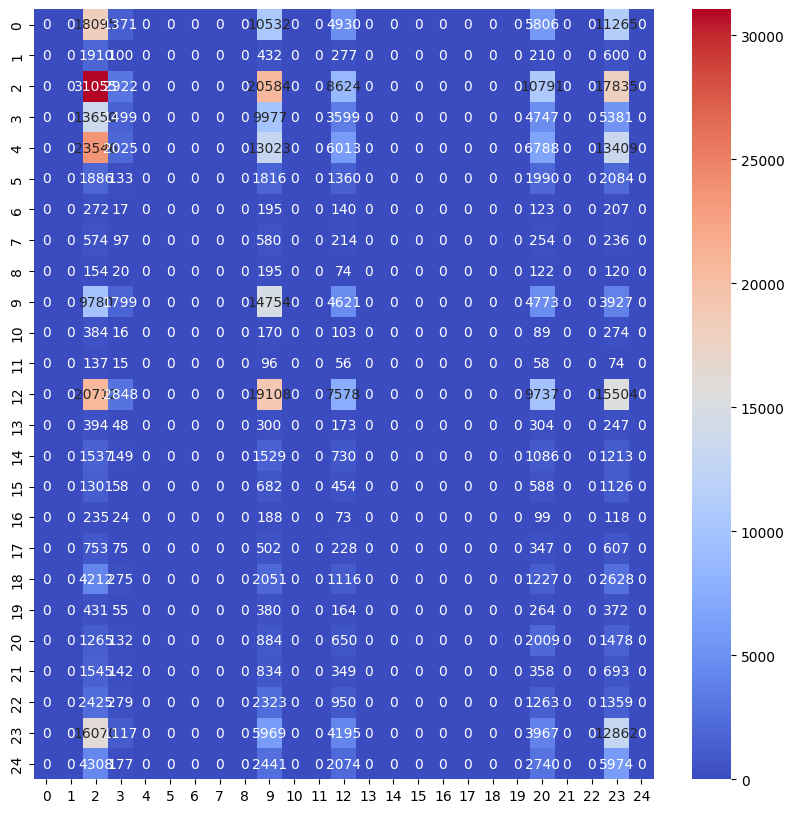

In [ ]:
from sklearn.metrics import confusion_matrix

cf=confusion_matrix(valy_,ypred_ll_1)
plt.figure(figsize=(10,10))
sns.heatmap(cf,annot=True,cmap='coolwarm',fmt='d')

**Two hidden layers**

In [ ]:
# fitting the model (two hidden layers)
model_ll_2=getModel_twohidden(Xdata,ydata)
model_ll_2.fit(Xdata, ydata, epochs=25, batch_size=32)

Epoch 1/25
620/620 [==============================] - 4s 4ms/step - loss: 3.7168 - accuracy: 0.0441
Epoch 2/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2189 - accuracy: 0.0503
Epoch 3/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2127 - accuracy: 0.0523
Epoch 4/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2072 - accuracy: 0.0543
Epoch 5/25
620/620 [==============================] - 2s 3ms/step - loss: 3.2027 - accuracy: 0.0551
Epoch 6/25
620/620 [==============================] - 2s 3ms/step - loss: 3.1971 - accuracy: 0.0570
Epoch 7/25
620/620 [==============================] - 3s 4ms/step - loss: 3.1947 - accuracy: 0.0607
Epoch 8/25
620/620 [==============================] - 2s 4ms/step - loss: 3.1927 - accuracy: 0.0616
Epoch 9/25
620/620 [==============================] - 2s 3ms/step - loss: 3.1907 - accuracy: 0.0603
Epoch 10/25
620/620 [==============================] - 2s 3ms/step - loss: 3.1890 - accuracy: 0.0628

In [ ]:
ypred_ll_2=model_ll_2.predict(valXdata)

15302/15302 [==============================] - 25s 2ms/step


In [ ]:
ypred_ll_2=np.argmax(ypred_ll_2, axis=1)
valy_=np.argmax(valydata,axis=1)

In [ ]:
print("Validation accuracy(two hidden layers): ",round(100*accuracy_score(valy_,ypred_ll_2),4),"%")

Validation accuracy(two hidden layers):  10.1839 %


**(ii) Using only zipcode for location**

In [ ]:
X_=X.iloc[:,2:]

In [ ]:
X_.columns

Index(['hour_of_day', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'zip_code_48201', 'zip_code_48202', 'zip_code_48203', 'zip_code_48204',
       'zip_code_48205', 'zip_code_48206', 'zip_code_48207', 'zip_code_48208',
       'zip_code_48209', 'zip_code_48210', 'zip_code_48211', 'zip_code_48212',
       'zip_code_48213', 'zip_code_48214', 'zip_code_48215', 'zip_code_48216',
       'zip_code_48217', 'zip_code_48219', 'zip_code_48221', 'zip_code_48223',
       'zip_code_48224', 'zip_code_48226', 'zip_code_48227', 'zip_code_48228',
       'zip_code_48234', 'zip_code_48235', 'zip_code_48236', 'zip_code_48238',
       'zip_code_48239', 'zip_code_48243'],
      dtype='object')

In [ ]:
Xdata=tf.convert_to_tensor(X_)
ydata=tf.convert_to_tensor(y)

In [ ]:
valX_=valX.iloc[:,2:]

valXdata=tf.convert_to_tensor(valX_)
valydata=tf.convert_to_tensor(valy)

**One hidden layer**

In [ ]:
# fitting the model
model_zip_1=getModel_onehidden(Xdata,ydata)
model_zip_1.fit(Xdata, ydata, epochs=100, batch_size=32)

Epoch 1/100
620/620 [==============================] - 3s 3ms/step - loss: 3.2587 - accuracy: 0.0463
Epoch 2/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2041 - accuracy: 0.0545
Epoch 3/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1920 - accuracy: 0.0599
Epoch 4/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1796 - accuracy: 0.0677
Epoch 5/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1641 - accuracy: 0.0775
Epoch 6/100
620/620 [==============================] - 2s 4ms/step - loss: 3.1502 - accuracy: 0.0847
Epoch 7/100
620/620 [==============================] - 3s 4ms/step - loss: 3.1391 - accuracy: 0.0873
Epoch 8/100
620/620 [==============================] - 3s 4ms/step - loss: 3.1328 - accuracy: 0.0912
Epoch 9/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1283 - accuracy: 0.0927
Epoch 10/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1251 - accura

In [ ]:
ypred_zip_1=model_zip_1.predict(valXdata)

15302/15302 [==============================] - 30s 2ms/step


In [ ]:
ypred_zip_1=np.argmax(ypred_zip_1, axis=1)
valy_=np.argmax(valydata,axis=1)

In [ ]:
print("Validation accuracy: ",round(100*accuracy_score(valy_,ypred_zip_1),4),"%")

Validation accuracy:  7.4913 %


**Two hidden layers**

In [ ]:
# fitting the model
model_zip_2=getModel_twohidden(Xdata,ydata)
model_zip_2.fit(Xdata, ydata, epochs=100, batch_size=32)

Epoch 1/100
620/620 [==============================] - 4s 4ms/step - loss: 3.2311 - accuracy: 0.0466
Epoch 2/100
620/620 [==============================] - 2s 4ms/step - loss: 3.1993 - accuracy: 0.0543
Epoch 3/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1863 - accuracy: 0.0641
Epoch 4/100
620/620 [==============================] - 2s 4ms/step - loss: 3.1716 - accuracy: 0.0725
Epoch 5/100
620/620 [==============================] - 2s 4ms/step - loss: 3.1552 - accuracy: 0.0771
Epoch 6/100
620/620 [==============================] - 3s 4ms/step - loss: 3.1421 - accuracy: 0.0838
Epoch 7/100
620/620 [==============================] - 4s 6ms/step - loss: 3.1344 - accuracy: 0.0873
Epoch 8/100
620/620 [==============================] - 2s 4ms/step - loss: 3.1271 - accuracy: 0.0909
Epoch 9/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1216 - accuracy: 0.0916
Epoch 10/100
620/620 [==============================] - 2s 4ms/step - loss: 3.1173 - accura

In [ ]:
ypred_zip_2=model_zip_2.predict(valXdata)

15302/15302 [==============================] - 28s 2ms/step


In [ ]:
ypred_zip_2=np.argmax(ypred_zip_2, axis=1)
valy_=np.argmax(valydata,axis=1)

In [ ]:
print("Validation accuracy: ",round(100*accuracy_score(valy_,ypred_zip_2),4),"%")

Validation accuracy:  7.2291 %


**(iii) Using both latitude,longitude and zipcode for location**

In [ ]:
X_=X.iloc[:,:]

In [ ]:
X_.columns

Index(['longitude', 'latitude', 'hour_of_day', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'zip_code_48201', 'zip_code_48202',
       'zip_code_48203', 'zip_code_48204', 'zip_code_48205', 'zip_code_48206',
       'zip_code_48207', 'zip_code_48208', 'zip_code_48209', 'zip_code_48210',
       'zip_code_48211', 'zip_code_48212', 'zip_code_48213', 'zip_code_48214',
       'zip_code_48215', 'zip_code_48216', 'zip_code_48217', 'zip_code_48219',
       'zip_code_48221', 'zip_code_48223', 'zip_code_48224', 'zip_code_48226',
       'zip_code_48227', 'zip_code_48228', 'zip_code_48234', 'zip_code_48235',
       'zip_code_48236', 'zip_code_48238', 'zip_code_48239', 'zip_code_48243'],
      dtype='object')

In [ ]:
Xdata=tf.convert_to_tensor(X_)
ydata=tf.convert_to_tensor(y)

In [ ]:
valX_=valX.iloc[:,:]

valXdata=tf.convert_to_tensor(valX_)
valydata=tf.convert_to_tensor(valy)

**One hidden layer**

In [ ]:
# fitting the model
model_ll_zip_1=getModel_onehidden(Xdata,ydata)
model_ll_zip_1.fit(Xdata, ydata, epochs=100, batch_size=32)

Epoch 1/100
620/620 [==============================] - 3s 3ms/step - loss: 5.3913 - accuracy: 0.0433
Epoch 2/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2275 - accuracy: 0.0433
Epoch 3/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2216 - accuracy: 0.0483
Epoch 4/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2175 - accuracy: 0.0482
Epoch 5/100
620/620 [==============================] - 2s 4ms/step - loss: 3.2129 - accuracy: 0.0533
Epoch 6/100
620/620 [==============================] - 2s 4ms/step - loss: 3.2113 - accuracy: 0.0514
Epoch 7/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2055 - accuracy: 0.0539
Epoch 8/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2045 - accuracy: 0.0533
Epoch 9/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1998 - accuracy: 0.0555
Epoch 10/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1960 - accura

In [ ]:
ypred_ll_zip_1=model_ll_zip_1.predict(valXdata)

15302/15302 [==============================] - 27s 2ms/step


In [ ]:
ypred_ll_zip_1=np.argmax(ypred_ll_zip_1, axis=1)
valy_=np.argmax(valydata,axis=1)

In [ ]:
print("Validation accuracy: ",round(100*accuracy_score(valy_,ypred_ll_zip_1),4),"%")

Validation accuracy:  6.4702 %


**Two hidden layers**

In [ ]:
# fitting the model
model_ll_zip_2=getModel_onehidden(Xdata,ydata)
model_ll_zip_2.fit(Xdata, ydata, epochs=100, batch_size=32)

Epoch 1/100
620/620 [==============================] - 3s 3ms/step - loss: 4.7343 - accuracy: 0.0407
Epoch 2/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2194 - accuracy: 0.0503
Epoch 3/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2160 - accuracy: 0.0522
Epoch 4/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2142 - accuracy: 0.0528
Epoch 5/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2114 - accuracy: 0.0510
Epoch 6/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2060 - accuracy: 0.0523
Epoch 7/100
620/620 [==============================] - 3s 4ms/step - loss: 3.2004 - accuracy: 0.0546
Epoch 8/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1952 - accuracy: 0.0547
Epoch 9/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1916 - accuracy: 0.0572
Epoch 10/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1871 - accura

In [ ]:
ypred_ll_zip_2=model_ll_zip_2.predict(valXdata)

15302/15302 [==============================] - 24s 2ms/step


In [ ]:
ypred_ll_zip_2=np.argmax(ypred_ll_zip_2, axis=1)
valy_=np.argmax(valydata,axis=1)

In [ ]:
print("Validation accuracy: ",round(100*accuracy_score(valy_,ypred_ll_zip_2),4),"%")

Validation accuracy:  6.6558 %


**RBF trained NN**

In [ ]:
from tensorflow.keras.layers.experimental import RandomFourierFeatures

model_rbf = keras.Sequential([
  keras.Input(shape=(X.shape[1],)),
  RandomFourierFeatures(
      output_dim=54,
      scale=10.,
      kernel_initializer='gaussian'),
  layers.Dense(units=y.shape[1], activation='softmax'),
])

model_rbf.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

model_rbf.fit(X,y,epochs=100,batch_size=32)

Epoch 1/100
620/620 [==============================] - 2s 3ms/step - loss: 3.2215 - categorical_accuracy: 0.0525
Epoch 2/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1918 - categorical_accuracy: 0.0625
Epoch 3/100
620/620 [==============================] - 3s 4ms/step - loss: 3.1884 - categorical_accuracy: 0.0660
Epoch 4/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1845 - categorical_accuracy: 0.0631
Epoch 5/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1825 - categorical_accuracy: 0.0653
Epoch 6/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1802 - categorical_accuracy: 0.0691
Epoch 7/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1777 - categorical_accuracy: 0.0688
Epoch 8/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1748 - categorical_accuracy: 0.0732
Epoch 9/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1747 - categorical_

In [ ]:
rbf_predict=model_rbf.predict(valX)

15302/15302 [==============================] - 27s 2ms/step


In [ ]:
ypred_rbf=np.argmax(rbf_predict, axis=1)
valy_=np.argmax(valydata,axis=1)

print("Validation accuracy(RBF): ",round(100*accuracy_score(ypred_rbf,valy_),4),"%")

Validation accuracy(RBF):  7.1533 %


<Axes: >

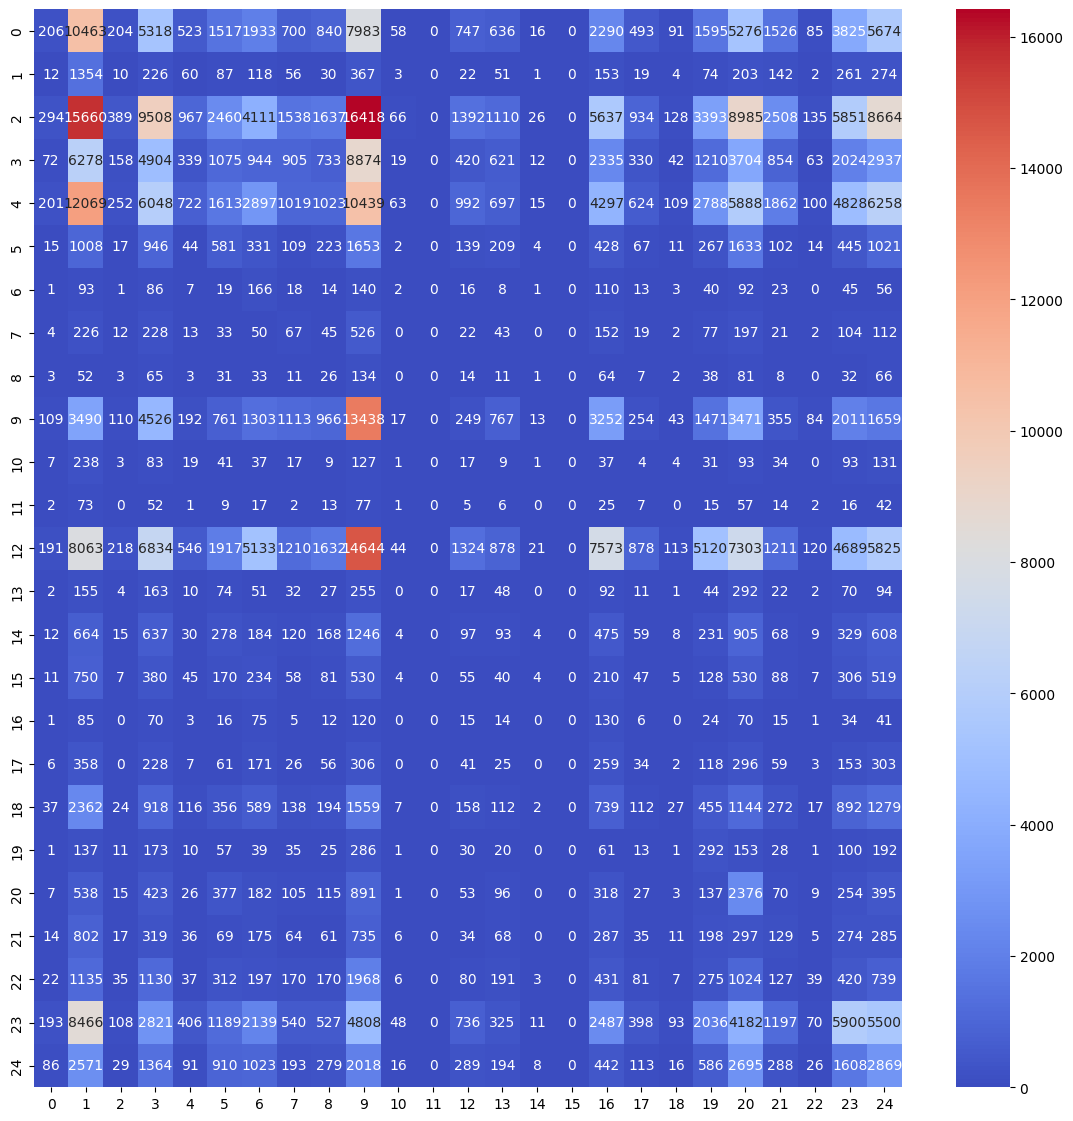

In [ ]:
cf=confusion_matrix(valy_,ypred_rbf)
plt.figure(figsize=(14,14))
sns.heatmap(cf,annot=True,cmap='coolwarm',fmt='d')

# **2. NN to Predict Crime Location**

In [ ]:
train.columns

Index(['longitude', 'latitude', 'hour_of_day', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'zip_code_48201', 'zip_code_48202',
       'zip_code_48203', 'zip_code_48204', 'zip_code_48205', 'zip_code_48206',
       'zip_code_48207', 'zip_code_48208', 'zip_code_48209', 'zip_code_48210',
       'zip_code_48211', 'zip_code_48212', 'zip_code_48213', 'zip_code_48214',
       'zip_code_48215', 'zip_code_48216', 'zip_code_48217', 'zip_code_48219',
       'zip_code_48221', 'zip_code_48223', 'zip_code_48224', 'zip_code_48226',
       'zip_code_48227', 'zip_code_48228', 'zip_code_48234', 'zip_code_48235',
       'zip_code_48236', 'zip_code_48238', 'zip_code_48239', 'zip_code_48243',
       'offense_category_AGGRAVATED ASSAULT', 'offense_category_ARSON',
       'offense_category_ASSAULT', 'offense_category_BURGLARY',
       'offense_category_DAMAGE TO PROPERTY',
       'offense_category_DANGEROUS DRUGS',
      

In [ ]:
X=train.drop(train.columns[10:40],axis=1)

In [ ]:
X=X.drop(['longitude','latitude'],axis=1)

In [ ]:
X.head()

,hour_of_day,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,offense_category_AGGRAVATED ASSAULT,offense_category_ARSON,...,offense_category_OBSTRUCTING THE POLICE,offense_category_OTHER,offense_category_OUIL,offense_category_ROBBERY,offense_category_RUNAWAY,offense_category_SEX OFFENSES,offense_category_SEXUAL ASSAULT,offense_category_STOLEN PROPERTY,offense_category_STOLEN VEHICLE,offense_category_WEAPONS OFFENSES
90839,21,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449514,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
395527,18,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84562,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184948,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=train[train.columns[10:40]]

In [ ]:
y.head()

,zip_code_48201,zip_code_48202,zip_code_48203,zip_code_48204,zip_code_48205,zip_code_48206,zip_code_48207,zip_code_48208,zip_code_48209,zip_code_48210,...,zip_code_48224,zip_code_48226,zip_code_48227,zip_code_48228,zip_code_48234,zip_code_48235,zip_code_48236,zip_code_48238,zip_code_48239,zip_code_48243
90839,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
449514,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
84562,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
valX=val.drop(val.columns[10:40],axis=1)
valX=valX.drop(['latitude','longitude'],axis=1)
valy=val[val.columns[10:40]]

**Single Layer NN**

In [ ]:
# Defining the model
model_loc_1 = keras.Sequential([
      keras.layers.Dense(36, input_shape=(X.shape[1],), activation='relu'),
      keras.layers.Dense(y.shape[1], activation='softmax'),
  ])

# Compiling the model
model_loc_1.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

#Fit the model
model_loc_1.fit(X,y, epochs=100, batch_size=32)

Epoch 1/100
620/620 [==============================] - 3s 3ms/step - loss: 3.2612 - accuracy: 0.0727
Epoch 2/100
620/620 [==============================] - 2s 4ms/step - loss: 3.1632 - accuracy: 0.0793
Epoch 3/100
620/620 [==============================] - 3s 5ms/step - loss: 3.1378 - accuracy: 0.0922
Epoch 4/100
620/620 [==============================] - 3s 5ms/step - loss: 3.1224 - accuracy: 0.0972
Epoch 5/100
620/620 [==============================] - 3s 4ms/step - loss: 3.1132 - accuracy: 0.0980
Epoch 6/100
620/620 [==============================] - 3s 4ms/step - loss: 3.1076 - accuracy: 0.0996
Epoch 7/100
620/620 [==============================] - 2s 4ms/step - loss: 3.1028 - accuracy: 0.1029
Epoch 8/100
620/620 [==============================] - 3s 5ms/step - loss: 3.0980 - accuracy: 0.1024
Epoch 9/100
620/620 [==============================] - 4s 6ms/step - loss: 3.0957 - accuracy: 0.1033
Epoch 10/100
620/620 [==============================] - 3s 4ms/step - loss: 3.0934 - accura

In [ ]:
ypred_loc_1=model_loc_1.predict(valX)

15302/15302 [==============================] - 25s 2ms/step


In [ ]:
ypred_loc_1=np.argmax(ypred_loc_1, axis=1)

valydata=tf.convert_to_tensor(valy)
valy_=np.argmax(valydata,axis=1)

print("NN for location: Accuracy: ",round(100*accuracy_score(valy_,ypred_loc_1),4),"%")

NN for location: Accuracy:  8.0997 %


**Two hidden Layers (MLP)**

In [ ]:
# Defining the model
model_loc_2 = keras.Sequential([
      keras.layers.Dense(27, input_shape=(X.shape[1],), activation='relu'),
      keras.layers.Dense(6, activation='relu'),
      keras.layers.Dense(y.shape[1], activation='softmax'),
  ])

# Compiling the model
model_loc_2.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

#Fit the model
model_loc_2.fit(X,y, epochs=100, batch_size=32)

Epoch 1/100
620/620 [==============================] - 4s 3ms/step - loss: 3.2966 - accuracy: 0.0688
Epoch 2/100
620/620 [==============================] - 3s 5ms/step - loss: 3.1693 - accuracy: 0.0788
Epoch 3/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1611 - accuracy: 0.0791
Epoch 4/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1559 - accuracy: 0.0799
Epoch 5/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1497 - accuracy: 0.0825
Epoch 6/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1403 - accuracy: 0.0895
Epoch 7/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1323 - accuracy: 0.0907
Epoch 8/100
620/620 [==============================] - 2s 4ms/step - loss: 3.1290 - accuracy: 0.0904
Epoch 9/100
620/620 [==============================] - 3s 4ms/step - loss: 3.1268 - accuracy: 0.0905
Epoch 10/100
620/620 [==============================] - 2s 3ms/step - loss: 3.1245 - accura

In [ ]:
ypred_loc_2=model_loc_2.predict(valX)

15302/15302 [==============================] - 27s 2ms/step


In [ ]:
ypred_loc_2=np.argmax(ypred_loc_2, axis=1)

valydata=tf.convert_to_tensor(valy)
valy_=np.argmax(valydata,axis=1)

print("NN for location: Accuracy: ",round(100*accuracy_score(valy_,ypred_loc_2),4),"%")

NN for location: Accuracy:  8.548 %


In [ ]:
def calcNearMiss(yact,ypred):
  total=len(yact)
  cnt=0
  for i in range(len(yact)):
    if abs(yact[i]-ypred[i])<3:
      cnt+=1

  return round((cnt/total)*100,4)

In [ ]:
print("Near miss percentage:\n")
print("Single layer MLP: ",calcNearMiss(valy_,ypred_loc_1),"%")
print("Two layer MLP: ",calcNearMiss(valy_,ypred_loc_2),"%")

Near miss percentage:

Single layer MLP:  25.6485 %
Two layer MLP:  28.7722 %


**Using top crime clusters alone**

In [ ]:
df.columns

Index(['X', 'Y', 'crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_timestamp', 'incident_time',
       'day_of_week', 'hour_of_day', 'year', 'scout_car_area', 'precinct',
       'block_id', 'neighborhood', 'council_district', 'zip_code', 'longitude',
       'latitude', 'ibr_date', 'oid'],
      dtype='object')

In [ ]:
df['offense_description'].nunique()

140

In [ ]:
df['offense_category'].nunique()

30

In [ ]:
df['offense_category'].value_counts()

ASSAULT                   92811
LARCENY                   76437
DAMAGE TO PROPERTY        65722
AGGRAVATED ASSAULT        52878
STOLEN VEHICLE            45035
FRAUD                     40496
BURGLARY                  39692
WEAPONS OFFENSES          18489
ROBBERY                   12265
DANGEROUS DRUGS           10019
STOLEN PROPERTY            9349
SEX OFFENSES               7168
OBSTRUCTING JUDICIARY      6994
OBSTRUCTING THE POLICE     4959
SEXUAL ASSAULT             4671
ARSON                      4279
OUIL                       3262
FAMILY OFFENSE             2705
RUNAWAY                    2416
MISCELLANEOUS              2216
HOMICIDE                   1786
DISORDERLY CONDUCT         1704
OTHER                      1487
FORGERY                    1435
KIDNAPPING                 1186
LIQUOR                      488
EXTORTION                   278
JUSTIFIABLE HOMICIDE        127
SOLICITATION                 33
GAMBLING                      9
Name: offense_category, dtype: int64

We develop a NN using only top 7 six clusters and all other clusters combined together as OTHER cluster

In [ ]:
top6=['ASSAULT','LARCENY','DAMAGE TO PROPERTY','AGGRAVATED ASSAULT','STOLEN VEHICLE','FRAUD','BURGLARY']
other=df['offense_category'].value_counts().index[7:]

In [ ]:
len(top6),len(other)

(7, 23)

In [ ]:
df2=df.copy()

In [ ]:
df2['offense_category']=df2['offense_category'].replace(other,'OTHER')

In [ ]:
df2['offense_category'].value_counts()

OTHER                 97325
ASSAULT               92811
LARCENY               76437
DAMAGE TO PROPERTY    65722
AGGRAVATED ASSAULT    52878
STOLEN VEHICLE        45035
FRAUD                 40496
BURGLARY              39692
Name: offense_category, dtype: int64

<Axes: xlabel='offense_category', ylabel='count'>

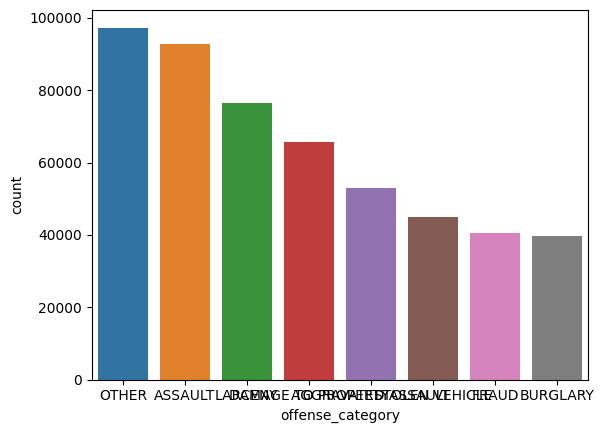

In [ ]:
import seaborn as sns
sns.countplot(data=df2,x='offense_category',order=df2['offense_category'].value_counts().index)

In [ ]:
0.7*df2['offense_category'].value_counts()[-1]

27784.399999999998

We take 27784 samples from each cluster to get train data. Similar compensation for ver large clusters

In [ ]:
def find_sample_size2(n,maxsize):
  if n<=70000:
    return 27784
  else:
    return 27784+int((n-70000)/(maxsize-70000)*3000)

ccnt=df2['offense_category'].value_counts()
maxsize=ccnt.max()

sample_size=[]

for i in ccnt:
  sample_size.append(find_sample_size2(i,maxsize))

In [ ]:
sample_size

[30784, 30288, 28490, 27784, 27784, 27784, 27784, 27784]

<Axes: >

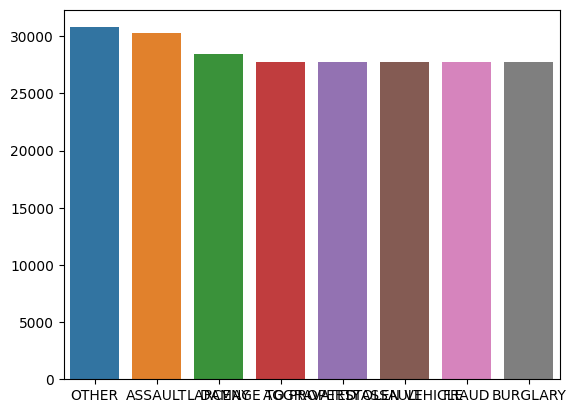

In [ ]:
sns.barplot(x=ccnt.index,y=sample_size)

In [ ]:
dfnew2=df2[['longitude','latitude','zip_code','day_of_week','hour_of_day','offense_category']]

In [ ]:
dfnew2 = pd.get_dummies(dfnew2, columns = ['day_of_week','zip_code','offense_category'])
dfnew2

,longitude,latitude,hour_of_day,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,...,zip_code_48239,zip_code_48243,offense_category_AGGRAVATED ASSAULT,offense_category_ASSAULT,offense_category_BURGLARY,offense_category_DAMAGE TO PROPERTY,offense_category_FRAUD,offense_category_LARCENY,offense_category_OTHER,offense_category_STOLEN VEHICLE
0,-83.179214,42.403909,16,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-82.950074,42.420468,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-83.096278,42.442265,17,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-83.238621,42.424490,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,-83.138597,42.363985,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510391,-83.277969,42.435172,23,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
510392,-82.954122,42.427815,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
510393,-83.160212,42.436876,8,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
510394,-83.077488,42.349938,11,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
train2=pd.DataFrame()
val2=pd.DataFrame()

In [ ]:
for cind in range(len(ccnt.index)):
  n=sample_size[cind]
  dftemp=dfnew2[dfnew2['offense_category_'+ccnt.index[cind]]==1]
  dftemp=dftemp.sample(frac=1)
  train2=pd.concat([train2,dftemp.iloc[:n,:]])
  val2=pd.concat([val2,dftemp.iloc[n:,:]])

In [ ]:
train2.shape,val2.shape

((228482, 48), (281914, 48))

In [ ]:
X2=train2.iloc[:,:40]
y2=train2.iloc[:,40:]

In [ ]:
valX2=val2.iloc[:,:40]
valy2=val2.iloc[:,40:]

**Using only latitude and longitude for location**

In [ ]:
X_=X2.iloc[:,:10]

In [ ]:
X_.columns

Index(['longitude', 'latitude', 'hour_of_day', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7'],
      dtype='object')

In [ ]:
import tensorflow as tf

In [ ]:
Xdata=tf.convert_to_tensor(X_)
ydata=tf.convert_to_tensor(y2)

In [ ]:
valX_=valX2.iloc[:,:10]

valXdata=tf.convert_to_tensor(valX_)
valydata=tf.convert_to_tensor(valy2)

**One hidden layer**

In [ ]:
# fitting the model (single hidden layer)
new_model_1=getModel_onehidden(Xdata,ydata)
new_model_1.fit(Xdata, ydata, epochs=25, batch_size=32)

Epoch 1/25
7141/7141 [==============================] - 29s 3ms/step - loss: 2.1947 - accuracy: 0.1412
Epoch 2/25
7141/7141 [==============================] - 22s 3ms/step - loss: 2.0861 - accuracy: 0.1484
Epoch 3/25
7141/7141 [==============================] - 23s 3ms/step - loss: 2.0779 - accuracy: 0.1557
Epoch 4/25
7141/7141 [==============================] - 23s 3ms/step - loss: 2.0719 - accuracy: 0.1607
Epoch 5/25
7141/7141 [==============================] - 23s 3ms/step - loss: 2.0684 - accuracy: 0.1637
Epoch 6/25
7141/7141 [==============================] - 29s 4ms/step - loss: 2.0645 - accuracy: 0.1656
Epoch 7/25
7141/7141 [==============================] - 36s 5ms/step - loss: 2.0605 - accuracy: 0.1675
Epoch 8/25
7141/7141 [==============================] - 35s 5ms/step - loss: 2.0565 - accuracy: 0.1714
Epoch 9/25
7141/7141 [==============================] - 31s 4ms/step - loss: 2.0538 - accuracy: 0.1738
Epoch 10/25
7141/7141 [==============================] - 24s 3ms/step - l

In [ ]:
ypred_newmodel_1=new_model_1.predict(valXdata)

8810/8810 [==============================] - 14s 2ms/step


In [ ]:
ypred_newmodel_1=np.argmax(ypred_newmodel_1, axis=1)
valy_=np.argmax(valydata,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print("Validation accuracy(one hidden layer): ",round(100*accuracy_score(valy_,ypred_newmodel_1),4),"%")

Validation accuracy(one hidden layer):  11.772 %


<Axes: >

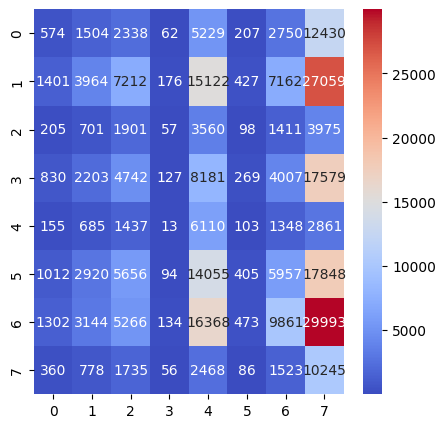

In [ ]:
import matplotlib.pyplot as plt
cf=confusion_matrix(valy_,ypred_newmodel_1)
plt.figure(figsize=(5,5))
sns.heatmap(cf,annot=True,cmap='coolwarm',fmt='d')

**Two hidden layers**

In [ ]:
# fitting the model (two hidden layers)
new_model_2=getModel_twohidden(Xdata,ydata)
new_model_2.fit(Xdata, ydata, epochs=25, batch_size=32)

Epoch 1/25
7141/7141 [==============================] - 26s 4ms/step - loss: 2.1406 - accuracy: 0.1406
Epoch 2/25
7141/7141 [==============================] - 25s 4ms/step - loss: 2.0663 - accuracy: 0.1632
Epoch 3/25
7141/7141 [==============================] - 24s 3ms/step - loss: 2.0496 - accuracy: 0.1772
Epoch 4/25
7141/7141 [==============================] - 26s 4ms/step - loss: 2.0442 - accuracy: 0.1801
Epoch 5/25
7141/7141 [==============================] - 25s 4ms/step - loss: 2.0415 - accuracy: 0.1814
Epoch 6/25
7141/7141 [==============================] - 25s 4ms/step - loss: 2.0403 - accuracy: 0.1830
Epoch 7/25
7141/7141 [==============================] - 25s 4ms/step - loss: 2.0394 - accuracy: 0.1840
Epoch 8/25
7141/7141 [==============================] - 28s 4ms/step - loss: 2.0385 - accuracy: 0.1840
Epoch 9/25
7141/7141 [==============================] - 24s 3ms/step - loss: 2.0375 - accuracy: 0.1856
Epoch 10/25
7141/7141 [==============================] - 24s 3ms/step - l

In [ ]:
ypred_newmodel_2=new_model_2.predict(valXdata)

8810/8810 [==============================] - 15s 2ms/step


In [ ]:
ypred_newmodel_2=np.argmax(ypred_newmodel_2, axis=1)
valy_=np.argmax(valydata,axis=1)

In [ ]:
print("Validation accuracy(two hidden layers): ",round(100*accuracy_score(valy_,ypred_newmodel_2),4),"%")

Validation accuracy(two hidden layers):  15.847 %


<Axes: >

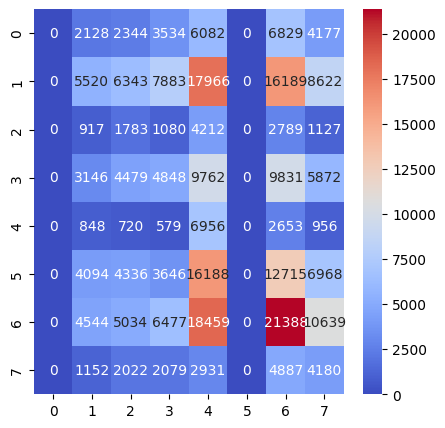

In [ ]:
cf=confusion_matrix(valy_,ypred_newmodel_2)
plt.figure(figsize=(5,5))
sns.heatmap(cf,annot=True,cmap='coolwarm',fmt='d')

# **Improvement of the model**

In [ ]:
def ANN(X,y):
  model = keras.Sequential([
      keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(150, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(100, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(y.shape[1], activation='softmax'),
  ])

  # Compiling the model
  model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

  return model

In [ ]:
# fitting the model
new_model_3=ANN(Xdata,ydata)
new_model_3.fit(Xdata, ydata, epochs=25, batch_size=32)

Epoch 1/25
7141/7141 [==============================] - 46s 6ms/step - loss: 2.0598 - accuracy: 0.1733
Epoch 2/25
7141/7141 [==============================] - 43s 6ms/step - loss: 2.0496 - accuracy: 0.1784
Epoch 3/25
7141/7141 [==============================] - 42s 6ms/step - loss: 2.0452 - accuracy: 0.1806
Epoch 4/25
7141/7141 [==============================] - 42s 6ms/step - loss: 2.0429 - accuracy: 0.1840
Epoch 5/25
7141/7141 [==============================] - 42s 6ms/step - loss: 2.0405 - accuracy: 0.1849
Epoch 6/25
7141/7141 [==============================] - 42s 6ms/step - loss: 2.0390 - accuracy: 0.1858
Epoch 7/25
7141/7141 [==============================] - 42s 6ms/step - loss: 2.0376 - accuracy: 0.1873
Epoch 8/25
7141/7141 [==============================] - 42s 6ms/step - loss: 2.0359 - accuracy: 0.1892
Epoch 9/25
7141/7141 [==============================] - 42s 6ms/step - loss: 2.0339 - accuracy: 0.1914
Epoch 10/25
7141/7141 [==============================] - 42s 6ms/step - l

In [ ]:
ypred_newmodel_3=new_model_3.predict(valXdata)

8810/8810 [==============================] - 19s 2ms/step


In [ ]:
ypred_newmodel_3=np.argmax(ypred_newmodel_3, axis=1)
valy_=np.argmax(valydata,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print("Validation accuracy: ",round(100*accuracy_score(valy_,ypred_newmodel_3),4),"%")

Validation accuracy:  19.2917 %


<Axes: >

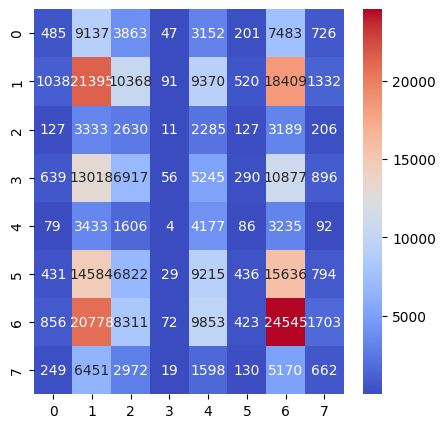

In [ ]:
import matplotlib.pyplot as plt
cf=confusion_matrix(valy_,ypred_newmodel_3)
plt.figure(figsize=(5,5))
sns.heatmap(cf,annot=True,cmap='coolwarm',fmt='d')